# Python Project - (Prosper loan Dataset Exploration)
## by (Danielle Okpokpor)

## Introduction
   >This prosper's loan dataset contains 113,937 loan entries with 81 exploratory variables for each loan. These variables explore informations like ListingKey (Unique key for each listing, same value as the 'key' used in the listing object in the API), LoanStatus (The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket), LoanOriginalAmount (The origination amount of the loan'), ListingCreationDate (The date the listing was created) etc.
    The aim of this exploration is to evaluate variables that can and might affect the loan and loan status and show relationships that might exist between other variables in the dataset.


## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np    #Numpy library
import pandas as pd   #Pandas library
import matplotlib.pyplot as plt  #Matplot lib library for visualization
import seaborn as sns  #Seaborn library for visualization 

In [2]:
df = pd.read_csv('Prosper Loan.csv') #Read the dataset CSV

In [3]:
df.head(5) #To call the top 5 records of the dataset

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
### What is the structure of your dataset?

df.shape

(113937, 81)

In [7]:
### What is/are the main feature(s) of interest in your dataset?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Univariate Exploration


## Question 1: What loan term did more borrowers settle for? 

In [24]:
df.Term.value_counts() #loan term and their count

36    87778
60    24545
12     1614
Name: Term, dtype: int64

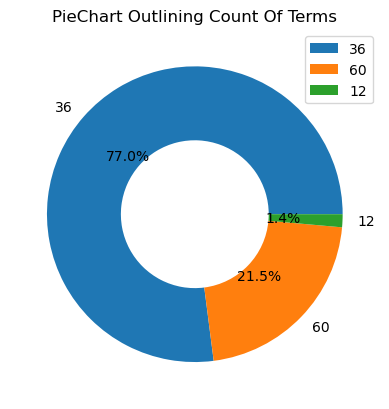

In [22]:
plt.pie(df.Term.value_counts(), labels = df.Term.value_counts().index, wedgeprops = {'width' : 0.5}, autopct = "%0.1f%%");
plt.title('PieChart Outlining Count Of Terms');plt.legend();
plt.show(); #To call a piechart showing the above values in percentage



>**Discussion**


>Term is the length of loan expressed in months and from our dataset the loans were expressed in 12months, 36months and 60 months respectively. From the chart above the Visualizations depict that more borrowers spread their loans over the duration of 36months and that account for 77% borrowers. 

## Question 2: What's the most likely loan status of the borrowers?

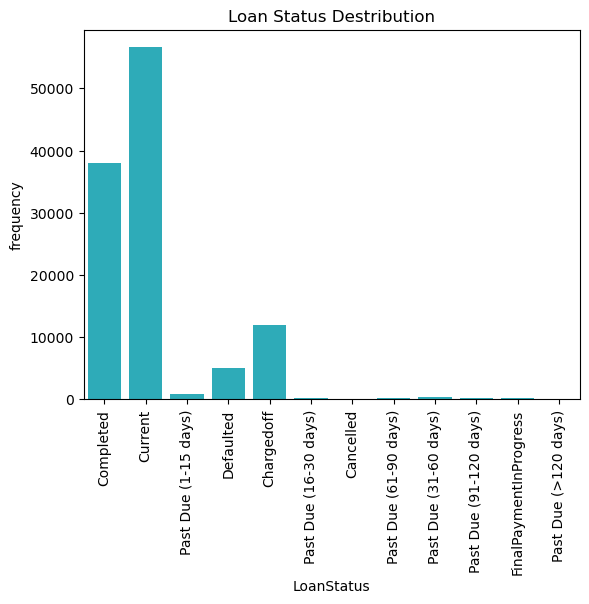

In [28]:
sns.countplot(data=df, x = 'LoanStatus', color= sns.color_palette()[9]); 
plt.title('Loan Status Destribution');
plt.xlabel('LoanStatus');
plt.ylabel('frequency');
plt.xticks(rotation=90);

>**Discussion**

>The loan status types were counted and analysed to show a plot that gave the highest borrowers status as the current status which inturn is the most likely status of borrowers, followed by the completed status. other status includes chargedoff, defaulted and several defaulted intervals. The least occurred loan status was the cancelled status with just two(2) borrowers.

## Question 3:What was the least credit rating assigned at the time the listing went live? 

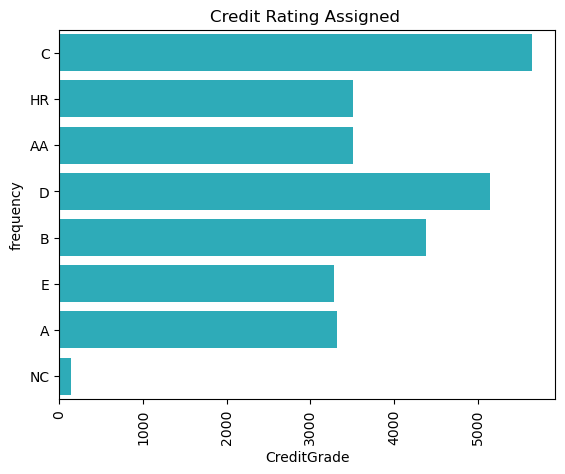

In [103]:
sns.countplot(data=df, y = 'CreditGrade', color= sns.color_palette()[9]); 
plt.title('Credit Rating Assigned ');
plt.xlabel('CreditGrade');
plt.ylabel('frequency');
plt.xticks(rotation=90);

>**Discussion**

>Credit grade is the credit rating that was assigned at the time the listing went live. Visualization of this credit grade helps us pinpoint the credit rating that was rather abandoned before the listing went live. The NC credit grade has the least assigned rating, this tells us figure out where incoming credits would be assigned.

## Question 4:What state were more borrowers from?

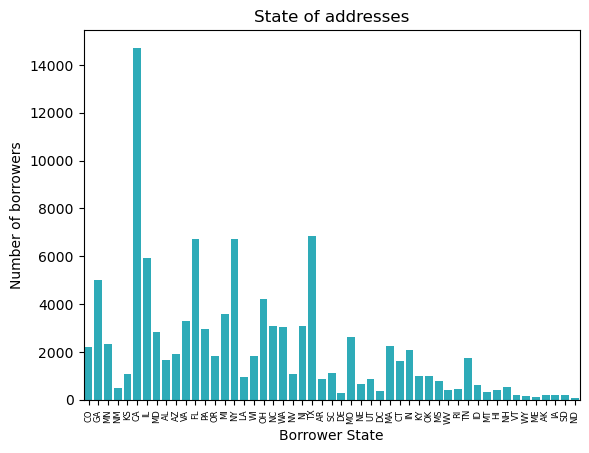

In [105]:
sns.countplot(data=df, x = 'BorrowerState', color= sns.color_palette()[9]); 
plt.title('State of addresses');
plt.xlabel('Borrower State');
plt.ylabel('Number of borrowers');
plt.xticks(rotation='90',size=6);

## Answer:

>**California**

## What is the general distribution observed in the BorrowerAPR dataset

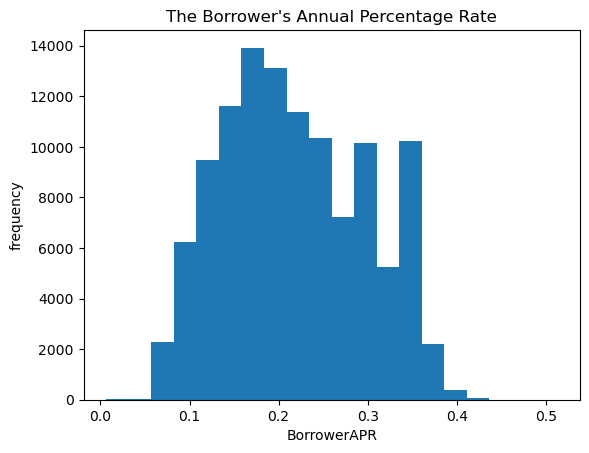

In [49]:
plt.hist(data= df, x= 'BorrowerAPR', bins= 20);
plt.title("The Borrower's Annual Percentage Rate");
plt.xlabel('BorrowerAPR');
plt.ylabel('frequency');

>**Discussion**

>Histogram plot uses it's bin edges on the x-axis and the corresponding frequencies on the y-axis. In the chart above, bins equals 20 to generate the representation of the data and therefore show frequency of the borrower's annual percentage rate expressed in that bin value to give a symmetric multimodal distribution.


## Bivariate Exploration

## Question 6: what relationship exist between the loan status of a borrower and his/her home ownership Status?

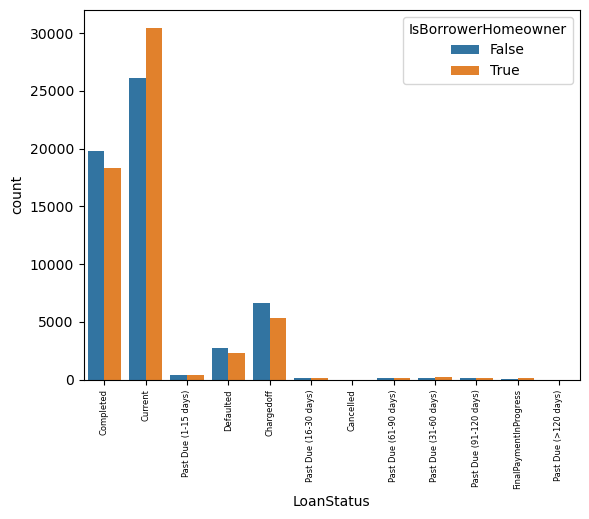

In [102]:
sns.countplot(data=df, x='LoanStatus', hue='IsBorrowerHomeowner');
plt.xticks(rotation='90',size=6);


> **Discussion**

>From our chart it is obvious that more people without homes completed the repayment of their loans within the term of borrowing. Therefore, it can be speculated that the cost of owning and maintaining a home directly affects the borrowers capability to repay.

## Question 7: What term experienced more defaulted loan status?

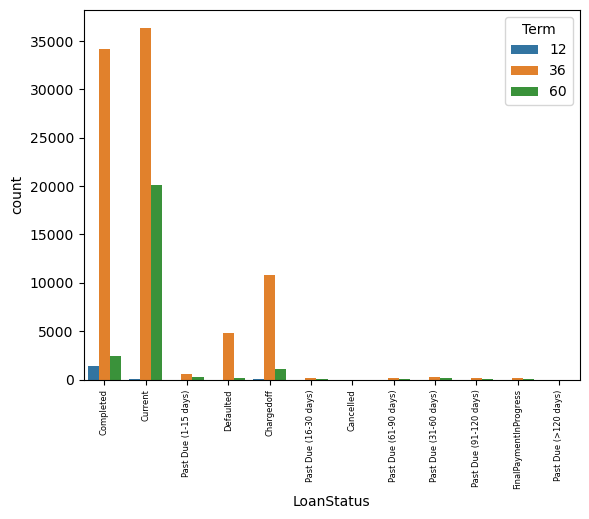

In [100]:
sns.countplot(data=df, x='LoanStatus', hue='Term');
plt.xticks(rotation='90',size=6);

> **Discussion**

>More borrowers spread their loans within the 36months period which also accounts for the higher percentage of defaulted borrowers. Also a fewer percentage of borrowers spread their loans over the 12months duration and a higher percentage of them had their loans duly refunded.


## If the BorrowerAPR and MonthlyLoanPayment were both calculated from the Loan original amount, show relationship

Text(0.5, 1.0, 'Relationship Curve')

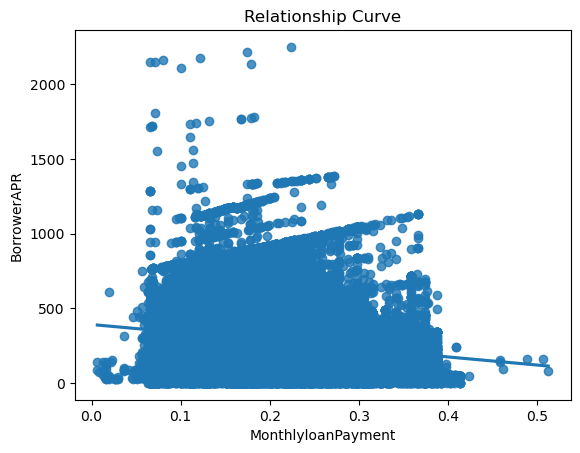

In [111]:
sns.regplot(data = df, y='MonthlyLoanPayment', x='BorrowerAPR');
plt.xlabel('MonthlyloanPayment');
plt.ylabel('BorrowerAPR');
plt.title('Relationship Curve')

>**Discussion**

A negative weak linear association was observed when BorrowerAPR accompained Monthly Loan Payment.


## LoanStatus Vs BorrowerAPR

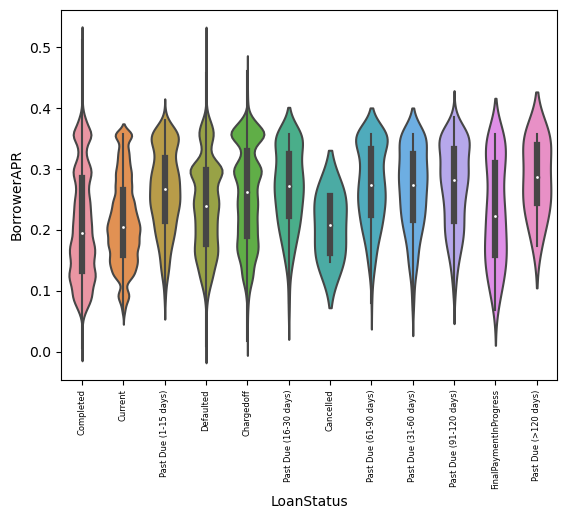

In [112]:
sns.violinplot(data=df, x='LoanStatus', y='BorrowerAPR');
plt.title('LoanStatus Vs BorrowerAPR');
plt.xlabel('LoanStatus');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation='90',size=6);

>**Discussion**

>This voilin plot shows relationship between the borrowerAPR and Loan status. it shows the median point, the interquartile range and the 1.5x interquartile range.

## Term Vs Loan Original Amount

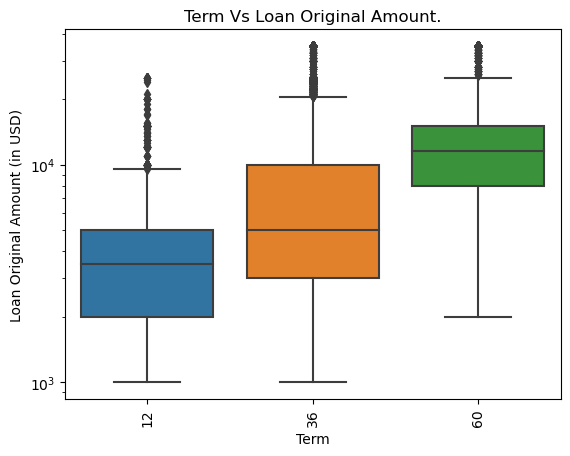

In [119]:
sns.boxplot(data=df, x='Term', y='LoanOriginalAmount');
plt.yscale('log')
plt.xticks(rotation=90);
plt.ylabel('Loan Original Amount (in USD)');
plt.title('Term Vs Loan Original Amount.');

> **Discussion**


 >A boxplot is used to Show this results. The results from this boxplot shows that the medians are in increasing order i.e, the longer the term the more the principal amount borrowed.

## Conclusion:

>As a result of this new analysis the Prosper Loan Leadership team has everything they need at their fingertips.The dashboard actions brought the data alive by highlighting that more non homeowners should be considered as they present a huge success rate at repayment. Also the 36 months term should not be encouraged.